Diabetes is a chronic medical condition where high blood sugar occurs because the body can't produce enough insulin or use it properly, leading to excess glucose in the blood.
# My objective is to analysis and predict diabetes using medical and demographic data.

In [1]:
#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# #ML Library
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# understanding the data

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

This shows the data has no mistake.

# EDA analysis of data

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

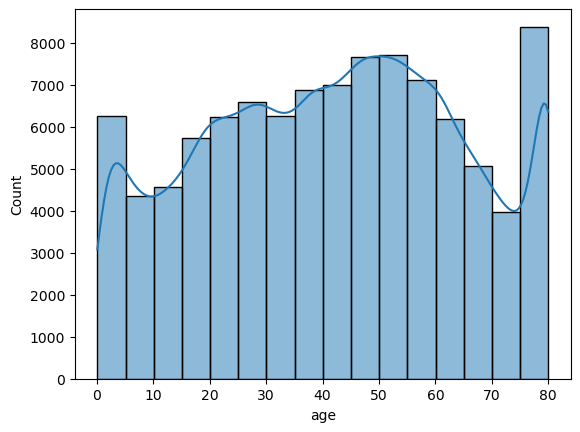

In [10]:
#histogram
sns.histplot(data=df, x="age", kde= "true", bins=16)

This distribution shows the age ranging from 0 to 80, and (75-80) has the highest age group.

<Axes: xlabel='age', ylabel='gender'>

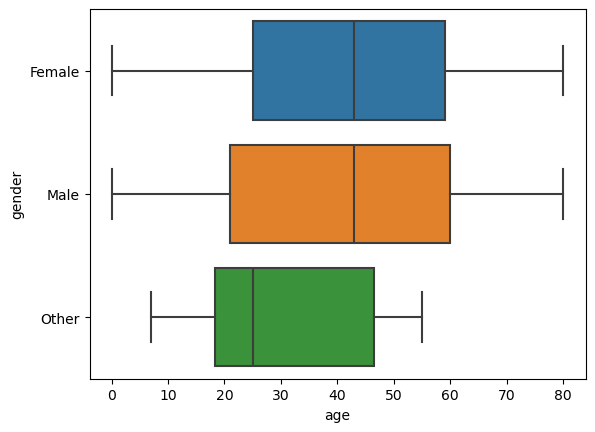

In [11]:
# boxplot
sns.boxplot(data=df, x= "age", y= "gender")

The box plot shows the age distribution for different genders in a diabetes study. Females have a broader age range, while males and others have a more concentrated age range, mostly between 30 and 50 years.

<Axes: xlabel='age', ylabel='diabetes'>

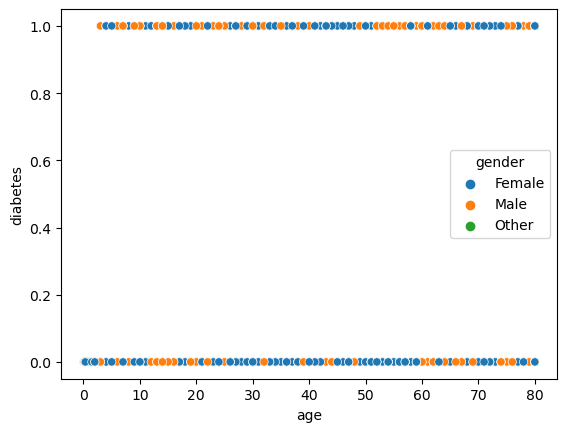

In [12]:
#scatterplot
sns.scatterplot(data=df, x="age", y="diabetes",hue="gender")

The scatter plot shows the relationship between age and diabetes, categorized by gender. The points are clustered at the extremes (0 and 1) for diabetes across all ages, indicating a binary presence of diabetes (either having it or not) regardless of age. There's no clear trend showing age affects the likelihood of diabetes, and the distribution is similar across genders.

<Axes: xlabel='hypertension', ylabel='diabetes'>

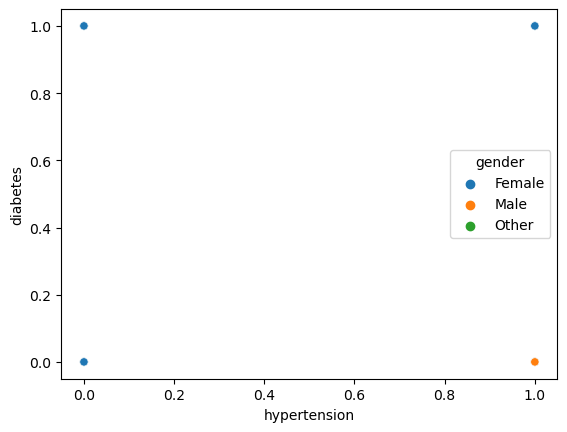

In [13]:
sns.scatterplot(data=df, x="hypertension", y="diabetes", hue= "gender")

The scatter plot shows the relationship between diabetes and hypertension, categorized by gender. From this figure, we can say that females have the highest value of diabetes but males have the highest value of hypertension.

<Axes: xlabel='smoking_history', ylabel='diabetes'>

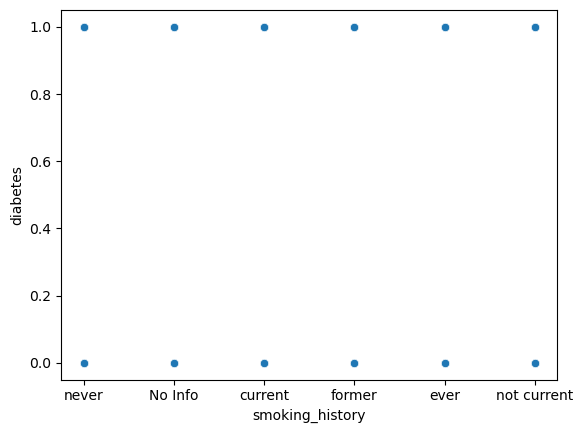

In [14]:
# scatterplot
sns.scatterplot(x='smoking_history',y='diabetes', data=df )

The plot shows that individuals with various smoking histories are distributed along the y-axis without a clear pattern, indicating that smoking history alone might not strongly correlate with diabetes in this dataset. Simply, smoking_history isnot correlated with diabtes.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='hypertension', ylabel='diabetes'>

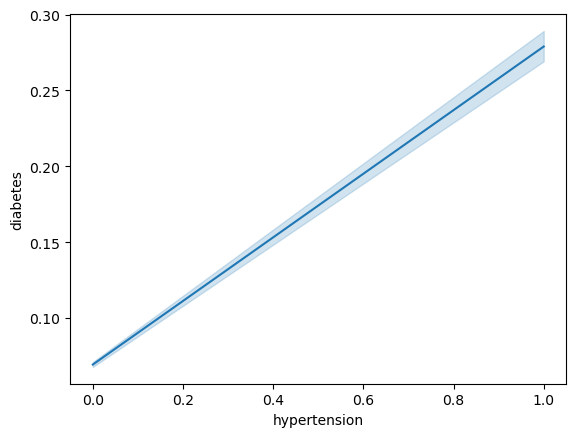

In [15]:
# lineplot
sns.lineplot(x='hypertension',y='diabetes', data=df )

The graph shows a positive linear relationship between hypertension and diabetes. As the value of hypertension increases, the diabetes value also rises, indicating that higher levels of hypertension are associated with an increase in diabetes. The trend is represented by a straight line with a shaded confidence interval.

<Axes: xlabel='HbA1c_level', ylabel='diabetes'>

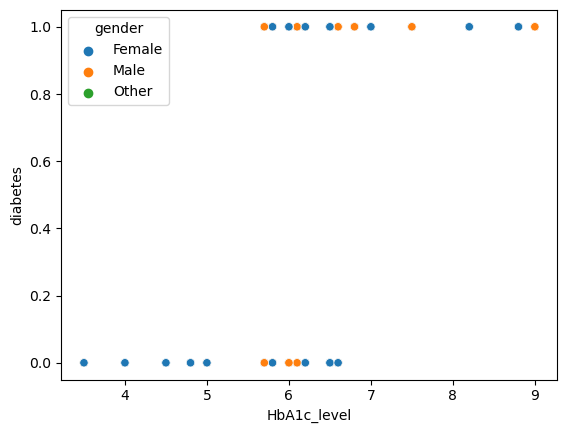

In [16]:
#scatterplot
sns.scatterplot(data=df, x="HbA1c_level", y="diabetes",hue="gender")

This scatter plot shows the relationship between HbA1c levels and diabetes status (1 for diabetic, 0 for non-diabetic) across different genders. Most diabetic individuals (marked as 1) have HbA1c levels above 6.5%, with no significant difference between genders. Non-diabetics mostly have HbA1c levels below 6.5%.

<Axes: xlabel='blood_glucose_level', ylabel='diabetes'>

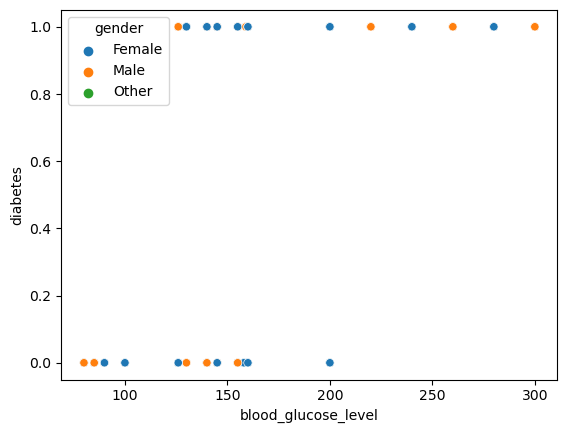

In [17]:
#scatterplot
sns.scatterplot(data=df, x="blood_glucose_level", y="diabetes",hue="gender")

This scatter plot illustrates the relationship between blood glucose levels and diabetes status (1 for diabetic, 0 for non-diabetic) across different genders. Diabetics have blood glucose levels above 200 mg/dL, while non-diabetics generally have levels below 150 mg/dL. Gender differences are not significantly distinct. 

<Axes: xlabel='bmi', ylabel='diabetes'>

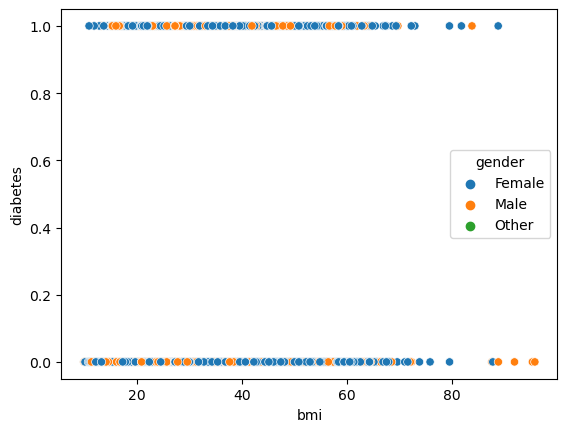

In [18]:
#scatterplot
sns.scatterplot(data=df, x="bmi", y="diabetes", hue="gender")

This scatter plot shows the relationship between BMI and diabetes status across different genders. Most diabetic individuals have higher BMIs, generally above 30, while non-diabetics mostly fall below this threshold. Gender differences in BMI among diabetics and non-diabetics are minimal.

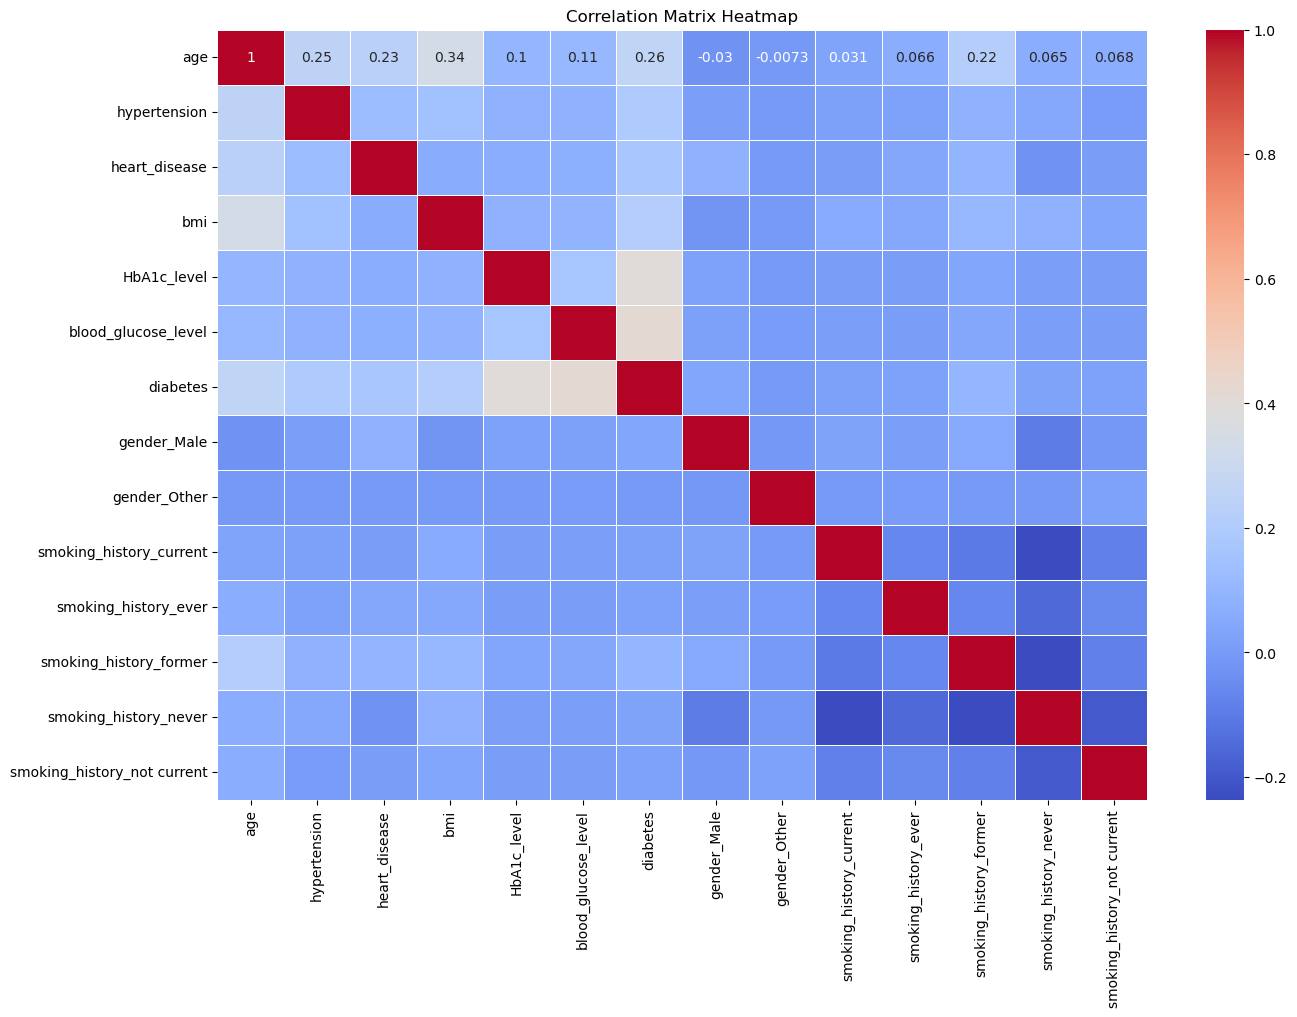

In [19]:
#correlation
# # One-Hot Encoding for Correlation Matrix
data_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = data_encoded.corr()

# # # Heatmap of correlation matrix

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

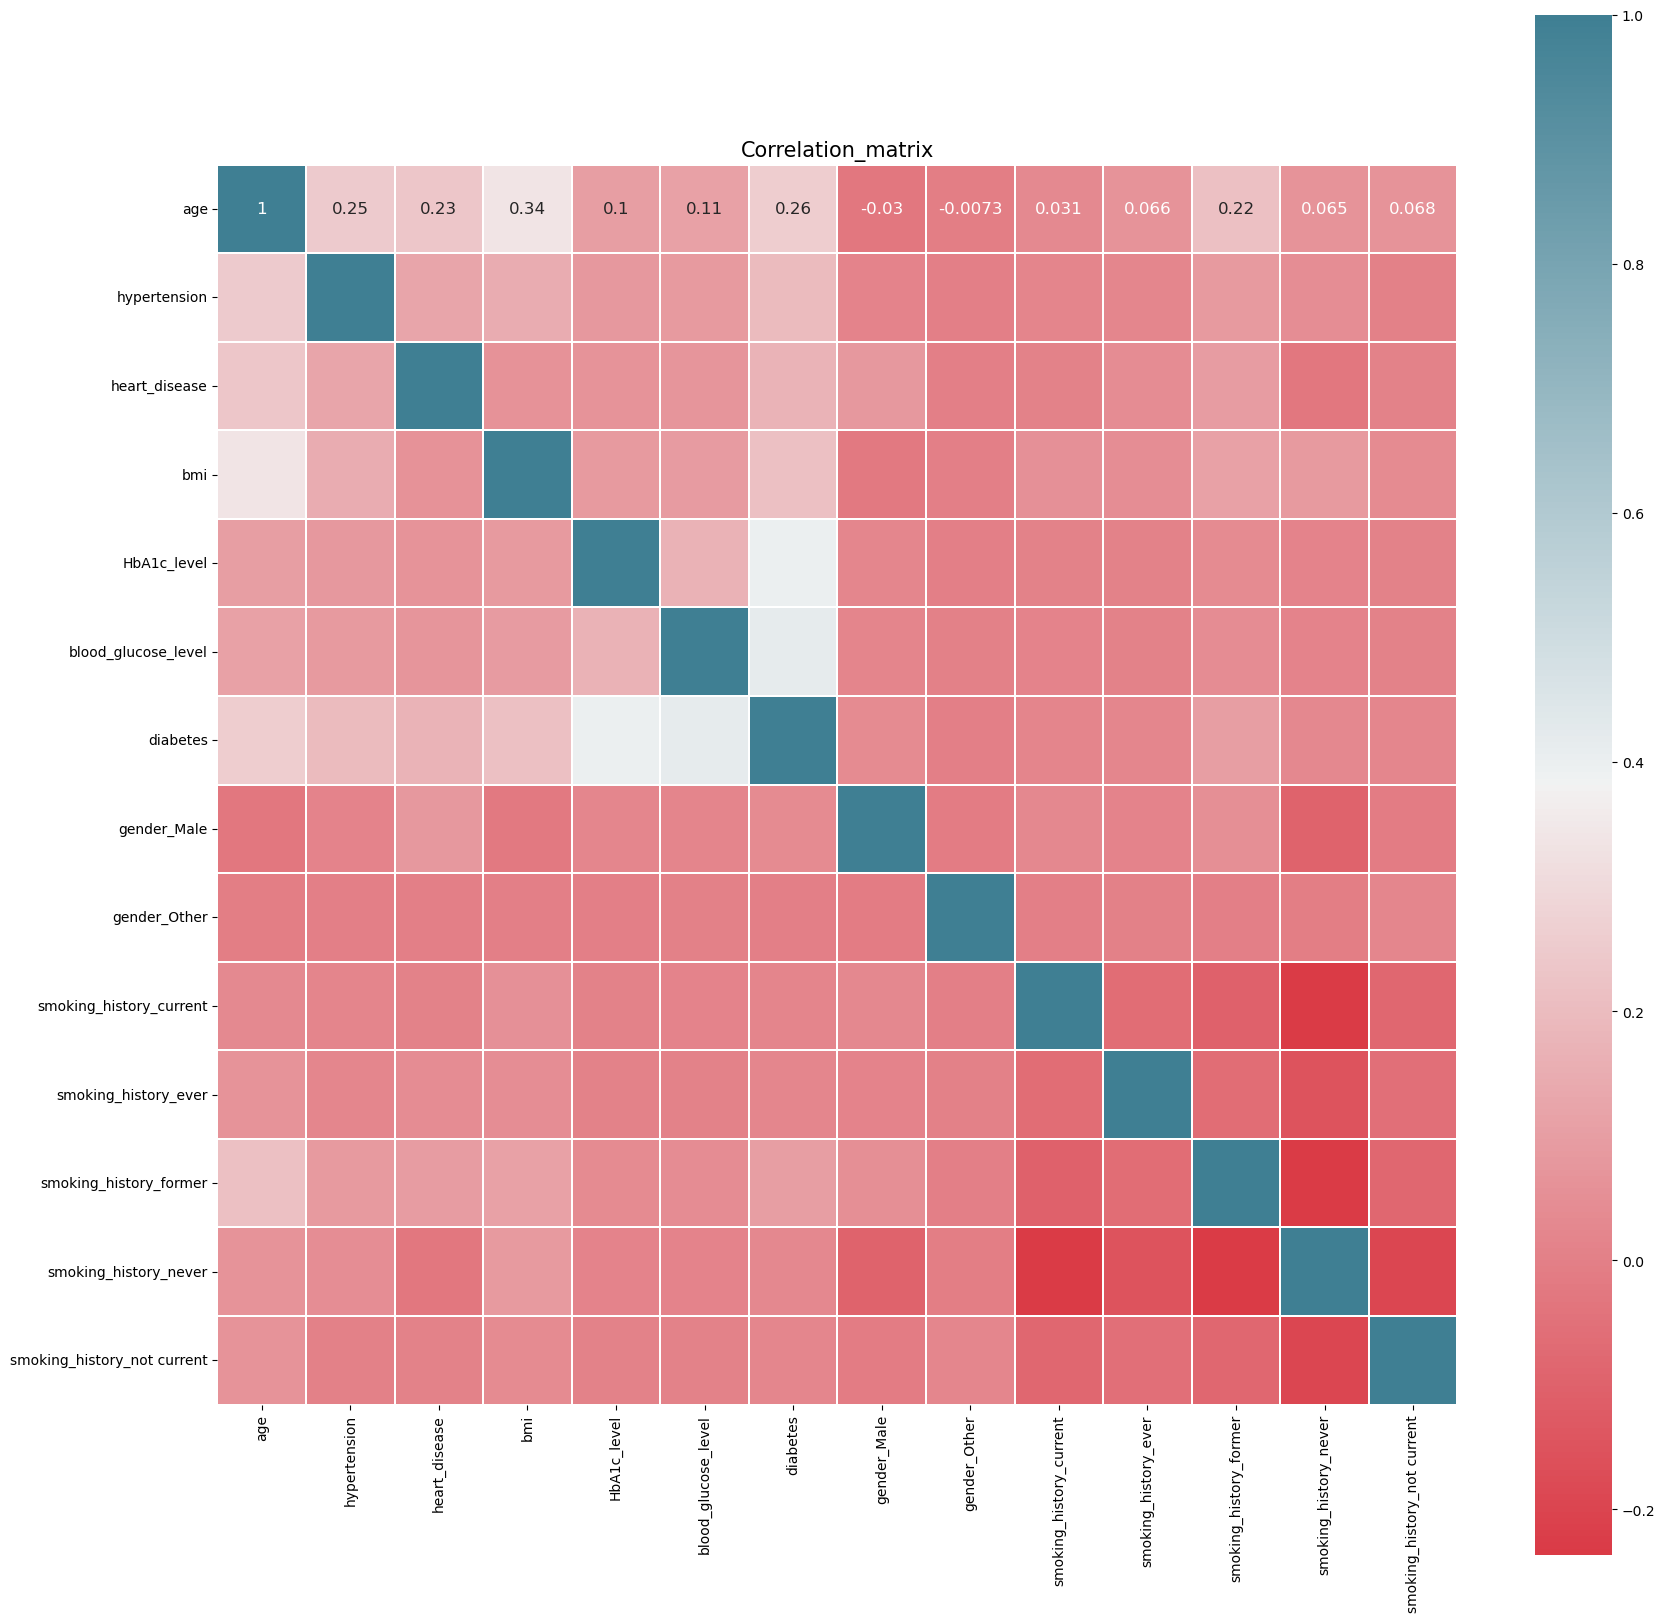

In [20]:
data_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(20,20))
plt.title('Correlation_matrix', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(data_encoded.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

This heatmap shows the blood_glucose_level and HbA1c_level are highly correlated with diabetes. Hypertension, heartdisease, bmi are about neutral to diabetes.

The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. Based on the figure, it is evident that blood glucose levels and HbA1c levels are essential factors to consider for diabetes prediction.